In [96]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

from sklearn.isotonic import IsotonicRegression


### Adding current directory to path

This is allows for using local modules

In [43]:
cw = os.getcwd()
if cw not in sys.path:
    sys.path.append(cw)
from beerparser import BeerParser

In [44]:
beer_df = pd.DataFrame(BeerParser('breaking_bad.html').get_beers())

In [45]:
beer_df.head()

,ABV,IBU,name,rating,style
0,6.3,NaN,Trolltunga,3.75,Sour - Farmhouse IPA
1,7.2,NaN,Snap Gate,3.75,IPA - New England
2,10.0,NaN,Original Rocky Road Ice Cream,4.00,Porter - Imperial / Double
3,10.0,NaN,Original Texas Pecan Ice Cream,4.25,Porter - Imperial / Double
4,3.2,NaN,In the Zawn,3.50,Table Beer


In [46]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 5 columns):
ABV       282 non-null float64
IBU       183 non-null float64
name      283 non-null object
rating    283 non-null float64
style     283 non-null object
dtypes: float64(3), object(2)
memory usage: 8.9+ KB


In [47]:
beer_df.describe()

,ABV,IBU,rating
count,282.000000,183.000000,283.000000
mean,8.070837,47.633880,3.788869
std,2.655804,27.435886,0.280561
min,0.500000,2.000000,2.750000
25%,6.000000,30.000000,3.500000
50%,8.000000,41.000000,3.750000
75%,10.100000,65.000000,4.000000
max,17.200000,250.000000,4.500000


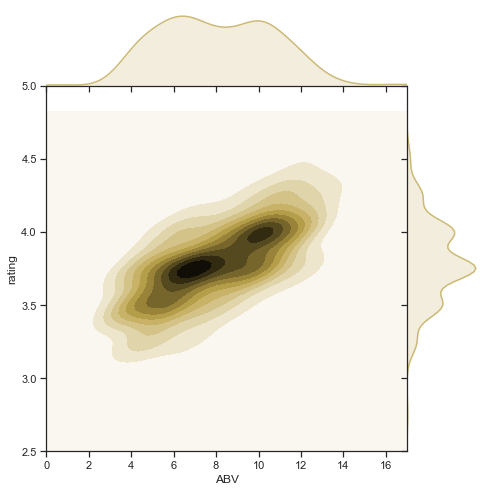

In [54]:
g = sns.jointplot("ABV", "rating", data=beer_df, kind="kde", space=0, color="y",
                  xlim=(0, 17), ylim=(2.5, 5), height=7)

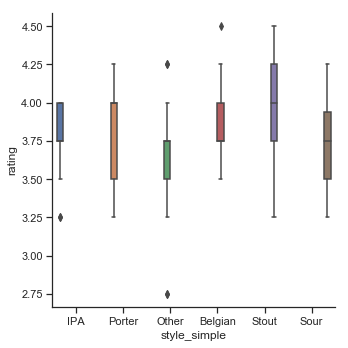

In [93]:
def simplify_style(style):
    simple_styles = set(['Stout', 'Belgian', 'Sour', 'Porter', 'Imperial Stout', 'IPA', 'Gose', 'New England'])
    new_style = list(simple_styles.intersection(set(style.split())))
    if len(new_style) > 0:
        return new_style[0]
    else:
        return 'Other'

beer_df['style_simple'] = beer_df['style'].apply(simplify_style)
sns.catplot(y="rating", x="style_simple", kind='box', hue="style_simple",
            palette="deep", data=beer_df)


In [127]:
beer_df = beer_df.dropna()

ir = IsotonicRegression()

predicted = ir.fit_transform(beer_df['ABV'].values, beer_df['rating'])

beer_df['predicted'] = predicted
beer_df['sq.error'] = (beer_df['rating'] - beer_df['predicted'])**2

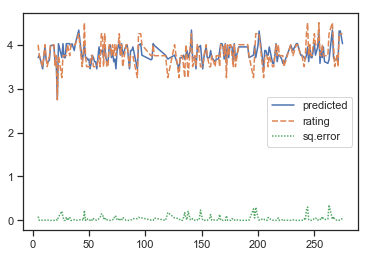

In [128]:
ax = sns.lineplot(data=beer_df[['predicted','rating','sq.error']])
